# hw1


In [44]:
import numpy as np
from numpy import *
import math
import random

## Q1

Write a function `Print_values` with arguments a, b, and c to reflect the following flowchart. Here the purple parallelogram operator on a list [x, y, z] is to compute and print `x+y-10z`. Try your output with some random a, b, and c values. Report your output when a = 10, b = 5, c = 1.

In [45]:
def Print_values(a,b,c):
    temp =[a,b,c]
    if a>b:
        if b>c:
            temp =[a,b,c]
        elif a>c:
            temp =[a,c,b]
        else:
            temp =[c,a,b]
    elif b>c:
        if a>c:
            temp =[a,c,b]
        else:
            temp =[c,a,b]
    else:
        temp =[c,b,a]

    return temp[0]+temp[1]-10*temp[2]


In [47]:
a =int(input("input vaulue of a: "))
b =int(input("input vaulue of b: "))
c =int(input("input vaulue of c: "))
print(Print_values(a,b,c))

5


## Q2

Given a list with N positive integers. For every element x of the list, find the value of continuous ceiling function defined as `F(x) = F(ceil(x/3)) + 2x`, where F(1) = 1.

In [5]:
def celing(x):
    if x ==1:
        return 1
    return celing(math.ceil(x/3))+2*x


In [51]:
N =input("input a list of positive intergers of x: ").split(',')
res =[]
for x in N:
    if x.isdigit() and int(x)>0:
        res.append(celing(int(x)))
    else:
        print('please input positive intergers')
        break

print(res)


[1, 7, 17, 5, 15]


## Q3
### 3.1
Given 10 dice each with 6 faces, numbered from 1 to 6. Write a function `Find_number_of_ways` to find the number of ways to get sum x, defined as the sum of values on each face when all the dice are thrown.

> https://www.geeksforgeeks.org/dice-throw-dp-30/
>#### eg
> **10次**丢出和**15**的次数 = 第**9**次丢出和分别为[9，10，11，12，13，14]的总和，同样的，第**9**次里丢出和**14**的次数 =第**8**次丢出和为[8，9，10，11，12，13]的总和，以此递推

In [32]:
def Find_number_of_ways(x):
    table=[[0]*(x+1) for i in range(11)]
    if x < 10 or x > 60:
        return 'please input within right range~'
    
    for j in range(1,min(7,x+1)):
        table[1][j]=1
    # print(table)
    for i in range(2,11):
        for j in range(1,x+1):
            for k in range(1,min(7,j)):
                table[i][j]+=table[i-1][j-k]

    return table[-1][-1]

In [43]:
X3 =int(input("input the sum(range from 10 to 60): "))
print(Find_number_of_ways(X3))

10


### 3.2
Count the number of ways for any x from 10 to 60, assign the number of ways to a list called `Number_of_ways`, so which x yields the maximum of `Number_of_ways`?

In [42]:
Number_of_ways =[]
for i in range(10,61):
    Number_of_ways.append(Find_number_of_ways(i))

print('The value',Number_of_ways.index(max(Number_of_ways))+1,'yields the maximum of Number of ways')

The value 26 yields the maximum of Number of ways


## Q4

### 4.1
Write a function `Random_integer` to fill an array of N elements by randomly selecting integers from 0 to 10.

In [39]:
def Random_integer(N):
    return np.random.randint(11, size =N)

print(Random_integer(5))

[ 1  8 10  2  7]


### 4.2
Write a function `Sum_averages` to compute the sum of the average of all subsets of the array. For example, given an array of [1, 2, 3], you `Sum_averages` function should compute the sum of: average of [1], average of [2], average of [3], average of [1, 2], average of [1, 3], average of [2, 3], and average of [1, 2, 3].


In [7]:
from numpy import *

def Sum_averages(nums):
    res = [[]]
    avg =[]
    for i in range(len(nums)):
        temp = []
        for j in range(len(res)):
            temp.append(res[j] + [nums[i]])
            avg.append(mean(temp[j]))
        res += temp
    return sum(avg)

print(Sum_averages([1,2]))

4.5


In [87]:
nums =list(map(int,input("input the list of values: ").split(',')))
print(Sum_averages(nums))

37.5


### 4.3
Call `Sum_averages` with N increasing from 1 to 100, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what do you see.

In [91]:
Total_sum_averages =[]
for i in range(1,101):
    temp =Random_integer(i)
    Total_sum_averages.append(Sum_averages(temp))

[1.]
[1.0]
[1. 2.]
[1.0, 4.5]
[1. 2. 3.]
[1.0, 4.5, 14.0]
[1. 2. 3. 4.]
[1.0, 4.5, 14.0, 37.5]
[1. 2. 3. 4. 5.]
[1.0, 4.5, 14.0, 37.5, 93.0]
[1. 2. 3. 4. 5. 6.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5]
[1. 2. 3. 4. 5. 6. 7.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006]
[1. 2. 3. 4. 5. 6. 7. 8.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5, 2555.0]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5, 2555.0, 5626.5]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5, 2555.0, 5626.5, 12282.0]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5, 2555.0, 5626.5, 12282.0, 26617.5]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.00000000000006, 1147.5, 2555.0, 56

KeyboardInterrupt: 

NameError: name 'plot' is not defined

## 5. Path counting

### 5.1
Create a matrix with N rows and M columns, fill the right-bottom corner and top-left corner cells with 1, and randomly fill the rest of matrix with integer 0 or 1.

In [24]:
import numpy as np

def create_matrix(N,M):
    temp =np.random.randint(0,2,(N,M))
    temp[0,0] =1
    temp[N-1,M-1] =1
    return temp

In [25]:
mat =list(map(int,input("create a matrix with N rows and M columns: ").split(',')))
ran_mat =create_matrix(mat[0],mat[1])
print("The new matrix is: \n",ran_mat)

The new matrix is: 
 [[1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0]
 [1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0]
 [0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1]
 [0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
 [0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0]
 [0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1]
 [0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0]
 [1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0]
 [1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1]
 [1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1]
 [1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1]]


### 5.2
Consider a cell marked with 0 as a blockage or dead-end, and a cell marked with 1 is good to go. Write a function `Count_path` to count total number of paths to reach the right-bottom corner cell from the top-left corner cell.

### 5.3
Let N = 10, M = 8, run Count_path for 1000 times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being 1) is re-filled with integer 0 or 1 randomly, report the mean of total number of paths from the 1000 runs.

## Special statistic

In [2]:
def vi_j(V,h):
    vi =[]
    vj =[]
    n =len(V)-h
    # print(n)
    for i in range(n):
        vi.append(V[i])
        vj.append(V[i+h])
    return vi,vj

def m(v,n):
    return 1/n*(sum(v))

def sigma(v,n):
    squr_sum =0
    for i in v:
        squr_sum += i**2
    return 1/n*squr_sum -m(v,n)**2

def c(vi,vj,mi,mj,n):
    cross_sum =0
    for i in range(n):
        cross_sum +=vi[i]*vj[i]
    return 1/n*cross_sum-mi*mj

def rho(c,sigma_i,sigma_j):
    if sigma_i !=0. and sigma_j !=0.:
        return c/(pow(sigma_i,0.5)*pow(sigma_j,0.5))
    else:
        return 0

def var(vi,vj,n):
    diff_sum =0
    for i in range(n):
        diff_sum +=(vi[i]-vj[i])**2
    return 1/(2*n)*diff_sum


In [3]:
def all(V,h):
    n =len(V)-h
    print(n)
    v_i, v_j =vi_j(V,h)
    # print(v_i,'\n',v_j)
    m_i =m(v_i,n)
    m_j =m(v_j,n)
    # print(m_j)
    sigma_i =sigma(v_i,n)
    sigma_j =sigma(v_j,n)
    # print(sigma_j)
    cov =c(v_i,v_j,m_i,m_j,n)
    cor =rho(cov,sigma_i,sigma_j)
    # print(cor)
    vars =var(v_i,v_j,n)
    return [m_i,m_j,sigma_i,sigma_j,cov,cor,vars]

In [4]:
results =[all([4,2,4,5,6,7],1),
        all([4,2,4,5,6,7],2),
        all([4,2,4,5,6,7],3),
        all([4,2,4,5,6,7],4),
        all([4,2,4,5,6,7],5)]
print('h =1: ',results[0],'\n',
        'h =2: ',results[1],'\n',
        'h =3: ',results[2],'\n',
        'h =4: ',results[3],'\n',
        'h =5: ',results[4],'\n')

5
4
3
2
1
h =1:  [4.2, 4.800000000000001, 1.7600000000000016, 2.9599999999999937, 1.4399999999999977, 0.6308996735095028, 1.1] 
 h =2:  [3.75, 5.5, 1.1875, 1.25, 0.625, 0.512989176042577, 2.125] 
 h =3:  [3.333333333333333, 6.0, 0.8888888888888911, 0.6666666666666643, 0.0, 0.0, 4.333333333333333] 
 h =4:  [3.0, 6.5, 1.0, 0.25, -0.5, -1.0, 7.25] 
 h =5:  [4.0, 7.0, 0.0, 0.0, 0.0, 0, 4.5] 



In [5]:
covarian =[]
correlog =[]
variogram =[]
for i in (results):
    variogram.append(i[6])
    covarian.append(i[4])
    correlog.append(i[5])

h =[5,10,15,20,25]

Text(0.5, 1.0, 'variogram')

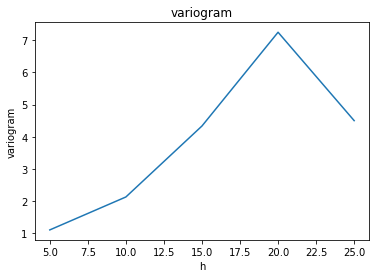

In [6]:

import matplotlib.pyplot as plt

plt.plot(h,variogram)
plt.xlabel('h')
plt.ylabel('variogram')
plt.title('variogram')

Text(0.5, 1.0, 'covariance')

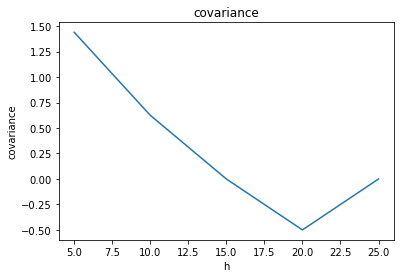

In [7]:
plt.plot(h,covarian)
plt.xlabel('h')
plt.ylabel('covariance')
plt.title('covariance')

Text(0.5, 1.0, 'correlogram')

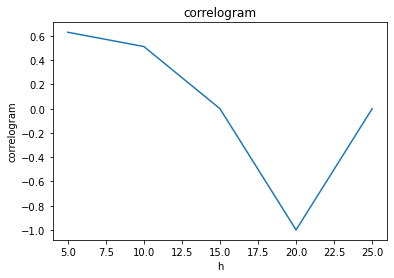

In [8]:
plt.plot(h,correlog)
plt.xlabel('h')
plt.ylabel('correlogram')
plt.title('correlogram')

In [9]:
import pandas as pd
data =pd.read_excel('I:\\jxt_work\\02_class\\SS\\118Z.xls')
print(data.Z)

FileNotFoundError: [Errno 2] No such file or directory: 'I:\\jxt_work\\02_class\\SS\\118Z.xls'

In [1]:
z_var =[]
for i in range(10):
    z_var.append(all(data.Z,i+1)[6])
print(z_var)

plt.plot([2,4,6,8,10,12,14,16,18,20],z_var)
plt.xlabel('h')
plt.ylabel('variogram')
plt.title('variogram')


NameError: name 'data' is not defined

In [12]:
def dou_all(v_i,v_j,n):

    m_i =m(v_i,n)
    m_j =m(v_j,n)
    # print(m_j)
    sigma_i =sigma(v_i,n)
    sigma_j =sigma(v_j,n)
    # print(sigma_j)
    cov =c(v_i,v_j,m_i,m_j,n)
    cor =rho(cov,sigma_i,sigma_j)
    # print(cor)
    vars =var(v_i,v_j,n)
    return [m_i,m_j,sigma_i,sigma_j,cov,cor,vars]

In [26]:
# h(0,1)
u1 =[4,6,5,7,6,8]
v1 =[2,2,3,4,4,6]

r1 =dou_all(u1,v1,6)

# h(0,2)
u2 =[4,5,6]
v2 =[2,4,6]

r2 =dou_all(u2,v2,3)

# h(1,0)
u3 =[4,6,7,5,7,8]
v3 =[2,3,4,3,4,6]

r3 =dou_all(u3,v3,6)

# h(2,0)
u4 =[4,6,7]
v4 =[3,4,6]

r4 =dou_all(u4,v4,3)

# h(1,1)
u5 =[4,6,5,7]
v5 =[3,4,4,6]

r5 =dou_all(u5,v5,4)

# h(2,2)
u6 =[4]
v6 =[6]

r6 =dou_all(u6,v6,1)

In [28]:
C_uv =[r1[4],r2[4],r3[4],r4[4],r5[4],r6[4]]
rho_uv =[r1[5],r2[5],r3[5],r4[5],r5[5],r6[5]]
V_uv =[0.75,3,0.666667,2.666667,2.75,12.5]

print(C_uv,'\n',rho_uv,'\n',V_uv)

[1.5, 1.3333333333333321, 1.5555555555555571, 1.44444444444445, 1.125, 0.0] 
 [0.8392543274162831, 1.0000000000000013, 0.9281909617845143, 0.9285714285714313, 0.9233805168766386, 0] 
 [0.75, 3, 0.666667, 2.666667, 2.75, 12.5]


In [29]:
# h(0,1)
u1 =[6,7,8,7,8,9]
v1 =[1,2,3,2,3,4]

r1 =dou_all(u1,v1,6)

# h(0,2)
u2 =[7,8,9]
v2 =[1,2,3]

r2 =dou_all(u2,v2,3)

# h(1,0)
u3 =[5,7,8,6,8,9]
v3 =[1,2,2,2,3,4]

r3 =dou_all(u3,v3,6)

# h(2,0)
u4 =[6,8,9]
v4 =[1,2,2]

r4 =dou_all(u4,v4,3)

# h(1,1)
u5 =[1,2,2,3]
v5 =[7,8,8,9]

r5 =dou_all(u5,v5,4)

# h(2,2)
u6 =[9]
v6 =[1]

r6 =dou_all(u6,v6,1)

In [30]:
C_vu =[r1[4],r2[4],r3[4],r4[4],r5[4],r6[4]]
print(C_vu)

[0.9166666666666643, 0.6666666666666643, 1.1111111111111143, 0.5555555555555571, 0.5, 0.0]


Text(0.5, 1.0, 'C_uv')

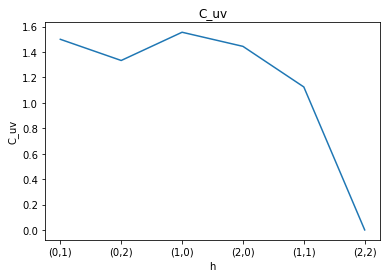

In [32]:
h_cv =[ '(0,1)', '(0,2)', '(1,0)', '(2,0)', '(1,1)', '(2,2)']
plt.plot(h_cv,C_uv)
plt.xlabel('h')
plt.ylabel('C_uv')
plt.title('C_uv')

Text(0.5, 1.0, 'rho_uv')

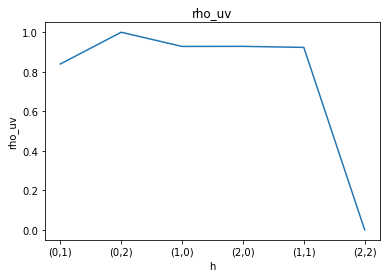

In [34]:
plt.plot(h_cv,rho_uv)
plt.xlabel('h')
plt.ylabel('rho_uv')
plt.title('rho_uv')

Text(0.5, 1.0, 'var_uv')

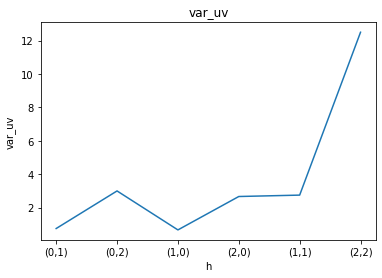

In [36]:
plt.plot(h_cv,V_uv)
plt.xlabel('h')
plt.ylabel('var_uv')
plt.title('var_uv')

Text(0.5, 1.0, 'C_vu')

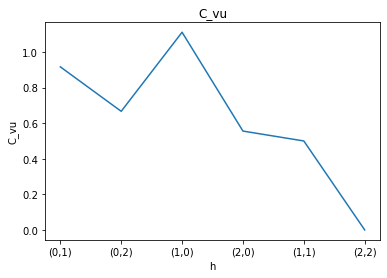

In [37]:
plt.plot(h_cv,C_vu)
plt.xlabel('h')
plt.ylabel('C_vu')
plt.title('C_vu')